# More Espresso, Less Depresso!

The aim of this project is to unpack these datasets, clean them up, explore them, and employ Python to extract meaningful insights. The goal is to bring the hidden stories within the data to life, using data analysis techniques and visualizations.

In choosing this topic for my first solo endeavor, I wanted to meld my personal interests with my professional skills, demonstrating the power of data science in unearthing realities of a subject close to my heart. 

So, get your cup of coffee ready, and let's dive into the captivating world of coffee data!

In [3]:
from IPython.display import HTML

HTML('''
<div style="border: 2px solid black; display: flex; justify-content: center; align-items: center; padding: 10px; margin-left: auto; margin-right: auto;">
    <img src="https://media.tenor.com/TkP3c2PCbYgAAAAd/funny-animals-ready-to-go.gif"/>
</div>
''')

# Questions

There are 2 Questions that I would like to have a look at followed by some lite Headscratchers.

Question 1: What is the correlation between domestic consumption and production?

Question 2: How does coffee consumption correlate with coffee import?

Coffee related Headscratchers:

    - Which country consumes the most coffee domestically?
    - What is the trend of coffee consumption over the years?
    - Who are the largest importers and exporters of coffee?
    - Which country has the highest coffee production?
    - How much coffee is consumed?
    - What is the relationship between coffee export and coffee import?

# Layout

    -Import libraries
    -Load datasets
    -Inspect data
    -Sort data
    -Reshape data
    -Question 1 - Visualizations
    -Question 2 - Visualizations
    -HeadScratchers

# Import the neccesary libraries...

In [4]:
import pandas as pd
import numpy as np

# Load the datasets:

In [5]:
df_domestic_cons = pd.read_csv('Coffee_domestic_consumption.csv')
df_importers_cons = pd.read_csv('Coffee_importers_consumption.csv')
df_import = pd.read_csv('Coffee_import.csv')
df_export = pd.read_csv('Coffee_export.csv')
df_re_export = pd.read_csv('Coffee_re_export.csv')
df_production = pd.read_csv('Coffee_production.csv')

# Inspect Data

Starting with the first dataset I will work my way through and look over all the data within the csv files.

    - Heads up!
    - Analyze
    - Come up with conclusions
    - Create insights into coffee consumption

In [6]:
#this is the first 8 rows of the domestic_consumption csv:
df_domestic_cons.head(8)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000
5,Indonesia,Robusta/Arabica,74520000,76800000,79140000,81540000,84000000,86580000,89160000,91920000,...,220020000,234000000,255000000,265020000,273000000,279000000,285000000,288000000,288360000,4920480000
6,Madagascar,Robusta,21000000,18000000,21000000,21600000,9999960,10020000,10020000,10020000,...,27000000,25800000,24600000,23400000,22200000,21600000,21900000,22500000,22500000,588705960
7,Malawi,Arabica,120000,120000,120000,120000,120000,120000,120000,120000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,2340000


In [7]:
#this is the first 8 rows of the importers_consumption csv:
df_importers_cons.head(8)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import_consumption
0,Austria,80400000,78120000,72720000,80100000,65160000,60720000,64560000,65220000,66300000,...,67020000,76140000,74940000,68100000,68160000,71580000,69720000,70320000,70380000,1904520000
1,Belgium,0,0,0,0,0,0,0,0,0,...,56040000,54900000,74700000,75540000,64440000,90120000,78000000,81900000,71100000,1460520000
2,Belgium/Luxembourg,67440000,42480000,41760000,47340000,57480000,64380000,62340000,53160000,78540000,...,0,0,0,0,0,0,0,0,0,514920000
3,Bulgaria,6120000,1020000,10500000,19620000,21180000,23580000,14760000,16500000,19440000,...,21600000,22560000,25140000,22560000,24360000,27120000,24900000,25560000,25380000,625080000
4,Croatia,0,0,8100000,7920000,9840000,17280000,18240000,21660000,19200000,...,22020000,21600000,23220000,22080000,22500000,22800000,21660000,21600000,22860000,564180000
5,Cyprus,1860000,2700000,2340000,4680000,2700000,2580000,3120000,2760000,2760000,...,4860000,5100000,5340000,4860000,5580000,5580000,5820000,7800000,6900000,122820000
6,Czechia,39540000,31500000,28320000,26880000,30540000,30660000,28500000,29100000,31380000,...,34320000,41100000,38220000,59880000,42480000,48360000,48240000,69480000,50580000,1141260000
7,Denmark,51900000,54540000,57540000,53460000,54480000,45480000,53700000,48480000,51240000,...,45720000,48000000,49320000,44880000,43860000,45180000,43980000,44340000,46680000,1452000000


In [8]:
#this is the first 8 rows of the coffee_importers csv:
df_import.head(8)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000
5,Cyprus,3000000,3240000,2460000,4620000,3120000,2640000,3120000,2460000,3000000,...,4920000,5040000,5640000,5640000,5340000,5580000,6000000,7980000,7980000,130380000
6,Czechia,39540000,31500000,28500000,30840000,33240000,33180000,31500000,33600000,45900000,...,57120000,67620000,71040000,109380000,124080000,106740000,90420000,114180000,96540000,1816020000
7,Denmark,57540000,58980000,63720000,59640000,61980000,52620000,60360000,56940000,60840000,...,54540000,54780000,55260000,51180000,50460000,54360000,51120000,52080000,54480000,1741860000


In [9]:
#this is the first 8 rows of the coffee exporters csv:
df_export.head(8)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,-2147483648,-2147483648,2056140000,1855500000,2138220000,-2147483648,33807709056
3,Burundi,35100000,41280000,38760000,25080000,30480000,31680000,13440000,31740000,22440000,...,13080000,23520000,11700000,15120000,13800000,12240000,10140000,12120000,17580000,646200000
4,Cameroon,156660000,105120000,98760000,42300000,32760000,24420000,33840000,82080000,44760000,...,29400000,37320000,16320000,22500000,23400000,16860000,14700000,17220000,15000000,1399920000
5,Central African Republic,11820000,8460000,6000000,8220000,8220000,13920000,5880000,12180000,6120000,...,4680000,4680000,60000,4500000,2580000,4800000,1080000,2340000,1140000,170700000
6,Colombia,836640000,755940000,993840000,814080000,706080000,588840000,635280000,655140000,675600000,...,464040000,430200000,580200000,657240000,762960000,769860000,779100000,768480000,820320000,19878480000
7,Congo,120000,60000,0,60000,60000,1140000,780000,180000,0,...,0,0,0,0,0,0,0,0,0,2400000


In [10]:
#this is the first 8 rows of the coffee re_exporters csv:
df_re_export.head(8)


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_re_export
0,Austria,24900000,45360000,57600000,32100000,22860000,13740000,9780000,13320000,12600000,...,21900000,18240000,18660000,23160000,22680000,18480000,18480000,15420000,16440000,869220000
1,Belgium,0,0,0,0,0,0,0,0,0,...,293640000,285240000,255420000,237180000,267600000,273000000,262620000,262620000,300840000,4779780000
2,Belgium/Luxembourg,53460000,62280000,67860000,76440000,78240000,79680000,89220000,99480000,136200000,...,0,0,0,0,0,0,0,0,0,742860000
3,Bulgaria,9960000,10980000,420000,4200000,6600000,7320000,1560000,1140000,1080000,...,7320000,11040000,11460000,14640000,16500000,19620000,17520000,18720000,21720000,205620000
4,Croatia,0,0,2040000,1860000,1800000,1920000,1020000,1440000,1140000,...,1440000,1440000,1560000,3060000,3780000,5940000,4680000,5160000,5160000,57900000
5,Cyprus,960000,420000,240000,120000,60000,60000,60000,60000,60000,...,0,60000,120000,480000,180000,240000,120000,60000,1380000,7980000
6,Czechia,0,0,180000,3960000,2700000,2520000,3000000,4560000,14460000,...,22800000,26460000,32760000,49500000,81540000,58380000,42180000,44760000,45960000,674640000
7,Denmark,5640000,4440000,6180000,6180000,7500000,7140000,6660000,8460000,9600000,...,8820000,6780000,5940000,6300000,6540000,9120000,7200000,7680000,7800000,289800000


In [11]:
#this is the first 8 rows of the coffee production csv:
df_production.head(8)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09
5,Indonesia,Robusta/Arabica,4.464600e+08,5.095800e+08,3.341400e+08,4.045800e+08,3.220800e+08,2.743800e+08,4.932600e+08,4.572600e+08,...,4.133400e+08,7.842000e+08,7.740600e+08,6.567600e+08,7.551000e+08,6.924600e+08,6.511200e+08,5.770800e+08,6.859800e+08,1.540488e+10
6,Madagascar,Robusta,5.892000e+07,5.598000e+07,6.732000e+07,2.652000e+07,3.846000e+07,4.710000e+07,5.094000e+07,3.744000e+07,...,3.510000e+07,3.000000e+07,3.504000e+07,3.006000e+07,2.484000e+07,2.718000e+07,2.424000e+07,2.274000e+07,2.298000e+07,1.045560e+09
7,Malawi,Arabica,6.300000e+06,7.440000e+06,8.220000e+06,3.720000e+06,5.040000e+06,5.460000e+06,2.940000e+06,3.660000e+06,...,1.560000e+06,1.380000e+06,1.680000e+06,1.500000e+06,1.260000e+06,1.200000e+06,8.400000e+05,7.800000e+05,9.600000e+05,8.226000e+07


# Sort Data

It looks like all our datasets have data from the year 1990 till 2019.
we will look at coffee consumption between 1990-1995; 1996-2001; 2002-2007; 2008-2013; 2014-2019 to see what affect the millenial workforce had on coffee consumption.

Sort data_frames that will be used to setup answers to Coffee related questions...

# Reshape Data

Reshaped for, Question 1: What is the correlation between domestic consumption and production?

In [12]:
df_production.columns = df_production.columns.str.replace("/", "_")
df_domestic_cons.columns = df_domestic_cons.columns.str.replace("/", "_")

In [13]:
melted_production = pd.melt(df_production, id_vars=['Country', 'Coffee type'], var_name='Year', value_name='Production')
melted_consumption = pd.melt(df_domestic_cons, id_vars=['Country', 'Coffee type'], var_name='Year', value_name='Consumption')

In [14]:
melted_production.head(3)

pd.options.display.float_format = '{:.0f}'.format

print(melted_production)


                               Country      Coffee type              Year  \
0                               Angola  Robusta/Arabica           1990_91   
1     Bolivia (Plurinational State of)          Arabica           1990_91   
2                               Brazil  Arabica/Robusta           1990_91   
3                              Burundi  Arabica/Robusta           1990_91   
4                              Ecuador  Arabica/Robusta           1990_91   
...                                ...              ...               ...   
1700                 Trinidad & Tobago          Robusta  Total_production   
1701                            Uganda  Robusta/Arabica  Total_production   
1702                         Venezuela          Arabica  Total_production   
1703                          Viet Nam  Robusta/Arabica  Total_production   
1704                             Yemen          Arabica  Total_production   

      Production  
0        3000000  
1        7380000  
2     1637160000  

In [15]:
melted_consumption.head(3)

,Country,Coffee type,Year,Consumption
0,Angola,Robusta/Arabica,1990_91,1200000
1,Bolivia (Plurinational State of),Arabica,1990_91,1500000
2,Brazil,Arabica/Robusta,1990_91,492000000


In [16]:
melted_production = melted_production[melted_production['Year'] != 'Total_production']
melted_consumption = melted_consumption[melted_consumption['Year'] != 'Total_domestic_consumption']

In [17]:
melted_production['Year'] = melted_production['Year'].astype(int)
melted_consumption['Year'] = melted_consumption['Year'].astype(int)

In [18]:
df_merged = melted_production.merge(melted_consumption, on=['Country', 'Coffee type', 'Year'])

In [19]:
df_merged.head(4)

,Country,Coffee type,Year,Production,Consumption
0,Angola,Robusta/Arabica,199091,3000000,1200000
1,Bolivia (Plurinational State of),Arabica,199091,7380000,1500000
2,Brazil,Arabica/Robusta,199091,1637160000,492000000
3,Burundi,Arabica/Robusta,199091,29220000,120000


In [20]:
#fixing the issue with the years, it looks like it is a season from 1990 - 1991
#to represent this we change it to 1990, 1991, 1992 etc...

# convert the 'Year' column to string
df_merged['Year'] = df_merged['Year'].astype(str)

# keep only the first four characters
df_merged['Year'] = df_merged['Year'].str[:4]

# convert the 'Year' column back to integer
df_merged['Year'] = df_merged['Year'].astype(int)


In [21]:
df_merged.tail(5)

,Country,Coffee type,Year,Production,Consumption
1645,Trinidad & Tobago,Robusta,2019,720000,600000
1646,Uganda,Robusta/Arabica,2019,330540000,15240000
1647,Venezuela,Arabica,2019,39000000,76500000
1648,Viet Nam,Robusta/Arabica,2019,1829220000,159000000
1649,Yemen,Arabica,2019,5460000,3840000


In [22]:
# Filter for years 1990-1995
production_c_95 = df_merged[(df_merged['Year'] >= 1990) & (df_merged['Year'] <= 1995)]

# Filter for years 1996-2001
production_c_01 = df_merged[(df_merged['Year'] >= 1996) & (df_merged['Year'] <= 2001)]

# Filter for years 2002-2007
production_c_07 = df_merged[(df_merged['Year'] >= 2002) & (df_merged['Year'] <= 2007)]

# Filter for years 2008-2013
production_c_13 = df_merged[(df_merged['Year'] >= 2008) & (df_merged['Year'] <= 2013)]

# Filter for years 2014-2019
production_c_19 = df_merged[(df_merged['Year'] >= 2014) & (df_merged['Year'] <= 2019)]

--------------------------------------------------------------------------------------------------------------------

Reshaped for, Question 2: How does importersconsumption correlate with coffee import?

In [23]:
df_importers_cons.columns = df_importers_cons.columns.str.replace("/", "_")
df_import.columns = df_import.columns.str.replace("/", "_")

In [24]:
melt_importers_cons = pd.melt(df_importers_cons, id_vars=['Country'], var_name='Year', value_name='Importers Consumption')
melt_imports = pd.melt(df_import, id_vars=['Country'], var_name='Year', value_name='Imports')

In [25]:
melt_importers_cons = melt_importers_cons[melt_importers_cons['Year'] != 'Total_import_consumption']
melt_imports = melt_imports[melt_imports['Year'] != 'Total_import']

In [26]:
melt_importers_cons.tail()

,Country,Year,Importers Consumption
1045,Russian Federation,2019,289200000
1046,Switzerland,2019,64380000
1047,Tunisia,2019,30480000
1048,United Kingdom,2019,226200000
1049,United States of America,2019,1638600000


In [27]:
melt_imports.head(3)

,Country,Year,Imports
0,Austria,1990,112800000
1,Belgium,1990,0
2,Belgium/Luxembourg,1990,120900000


In [28]:
#remove the rows with zero vlaues and or null values...
# Remove rows with zeros or null values
melt_importers_cons = melt_importers_cons[(melt_importers_cons['Importers Consumption'] != 0) & (melt_importers_cons['Importers Consumption'].notnull())]
melt_imports = melt_imports[(melt_imports['Imports'] != 0) & (melt_imports['Imports'].notnull())]

In [29]:
melt_importers_cons.head(4)

,Country,Year,Importers Consumption
0,Austria,1990,80400000
2,Belgium/Luxembourg,1990,67440000
3,Bulgaria,1990,6120000
5,Cyprus,1990,1860000


In [30]:
melt_imports.head(4)

,Country,Year,Imports
0,Austria,1990,112800000
2,Belgium/Luxembourg,1990,120900000
3,Bulgaria,1990,16080000
5,Cyprus,1990,3000000


In [31]:
melt_importers_cons['Year'] = melt_importers_cons['Year'].astype(int)
melt_imports['Year'] = melt_imports['Year'].astype(int)

In [32]:
imports_merged = melt_importers_cons.merge(melt_imports, on=['Country', 'Year'])

In [33]:
imports_merged.head()

,Country,Year,Importers Consumption,Imports
0,Austria,1990,80400000,112800000
1,Belgium/Luxembourg,1990,67440000,120900000
2,Bulgaria,1990,6120000,16080000
3,Cyprus,1990,1860000,3000000
4,Czechia,1990,39540000,39540000


In [34]:
# Filter for years 1990-1995
imports_95 = imports_merged[(imports_merged['Year'] >= 1990) & (imports_merged['Year'] <= 1995)]

# Filter for years 1996-2001
imports_01 = imports_merged[(imports_merged['Year'] >= 1996) & (imports_merged['Year'] <= 2001)]

# Filter for years 2002-2007
imports_07 = imports_merged[(imports_merged['Year'] >= 2002) & (imports_merged['Year'] <= 2007)]

# Filter for years 2008-2013
imports_13 = imports_merged[(imports_merged['Year'] >= 2008) & (imports_merged['Year'] <= 2013)]

# Filter for years 2014-2019
imports_19 = imports_merged[(imports_merged['Year'] >= 2014) & (imports_merged['Year'] <= 2019)]

--------------------------------------------------------------------------------------------------------------------

# QUESTION 1: What is the correlation between domestic consumption and production?

In [35]:
# The correlation coefficient of the domestic consumption and production 1990 - 2019; split up in five year intervals:

corr_pdc_95 = production_c_95['Production'].corr(production_c_95['Consumption'])
print("Correlation coefficient from 1990 till 95 incl:", corr_pdc_95)

corr_pdc_01 = production_c_01['Production'].corr(production_c_01['Consumption'])
print("Correlation coefficient from 1996 till 2001 incl:", corr_pdc_01)

corr_pdc_07 = production_c_07['Production'].corr(production_c_07['Consumption'])
print("Correlation coefficient from 2002 till 2007 incl:", corr_pdc_07)

corr_pdc_13 = production_c_13['Production'].corr(production_c_13['Consumption'])
print("Correlation coefficient from 2008 till 2013 incl:", corr_pdc_13)

corr_pdc_19 = production_c_19['Production'].corr(production_c_19['Consumption'])
print("Correlation coefficient from 2014 till 2019 incl:", corr_pdc_19)

Correlation coefficient from 1990 till 95 incl: 0.8994251003453321
Correlation coefficient from 1996 till 2001 incl: 0.9086328786510216
Correlation coefficient from 2002 till 2007 incl: 0.9051641632520772
Correlation coefficient from 2008 till 2013 incl: 0.9215838274380125
Correlation coefficient from 2014 till 2019 incl: 0.8970926211585032


A correlation coefficient of 0.8 and 0.9 indicates a very strong positive linear relationship between two variables. 

Here's what it means:

A coefficient of 0.9 indicates that as one variable increases, the other variable also tends to increase.

In the context of coffee consumption; as domestic consumption of coffee increases, the production of coffee also tends to increase.

We can see that the correlation of all 5 year intervals have a Very Strong Positive correlation.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

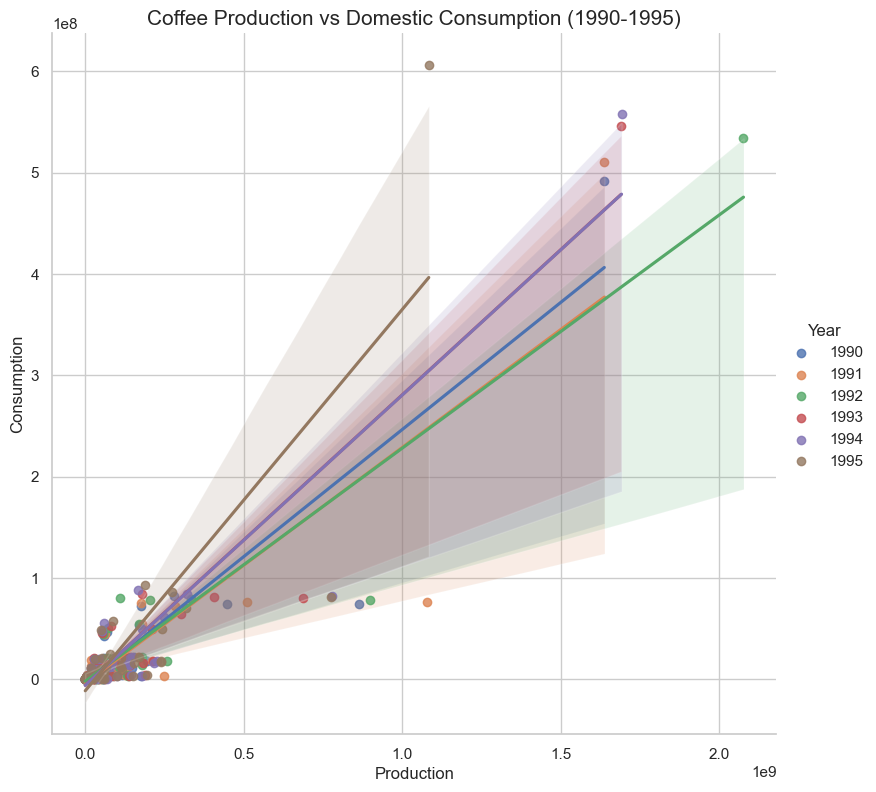

<Figure size 640x480 with 0 Axes>

In [37]:
sns.set_theme(style="whitegrid") 

sns.lmplot(data=production_c_95, x="Production", y="Consumption", hue="Year", palette="deep", height=8)

plt.title('Coffee Production vs Domestic Consumption (1990-1995)', fontsize=15) 
plt.xlabel('Production', fontsize=12) 
plt.ylabel('Consumption', fontsize=12)

plt.show()
plt.clf()

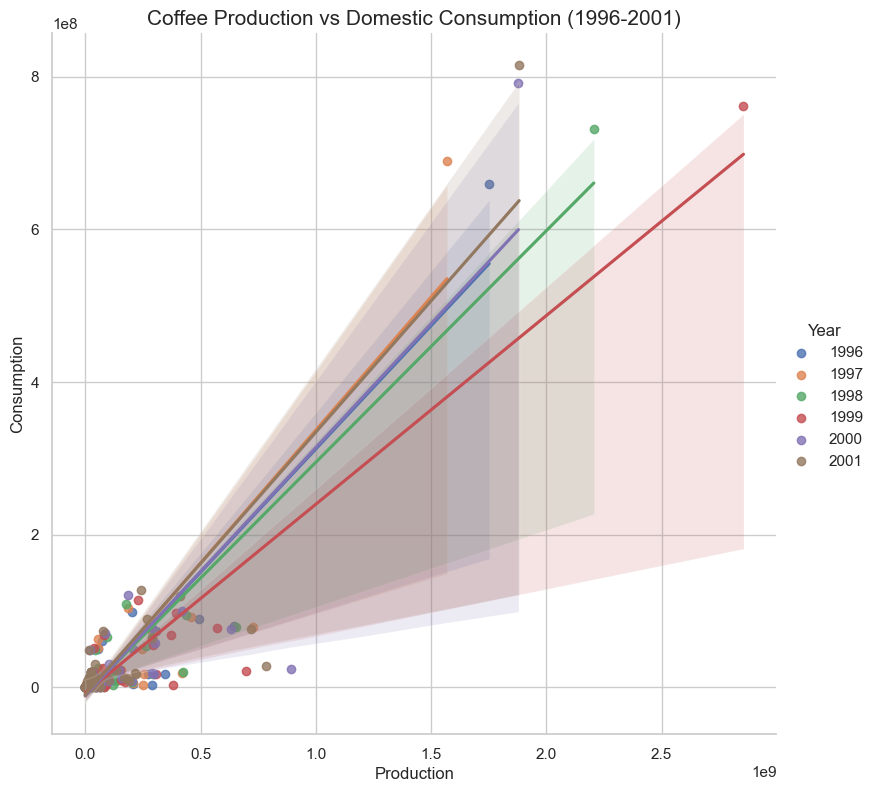

In [38]:
sns.set_theme(style="whitegrid") 

sns.lmplot(data=production_c_01, x="Production", y="Consumption", hue="Year", palette="deep", height=8)

plt.title('Coffee Production vs Domestic Consumption (1996-2001)', fontsize=15) 
plt.xlabel('Production', fontsize=12) 
plt.ylabel('Consumption', fontsize=12)

plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

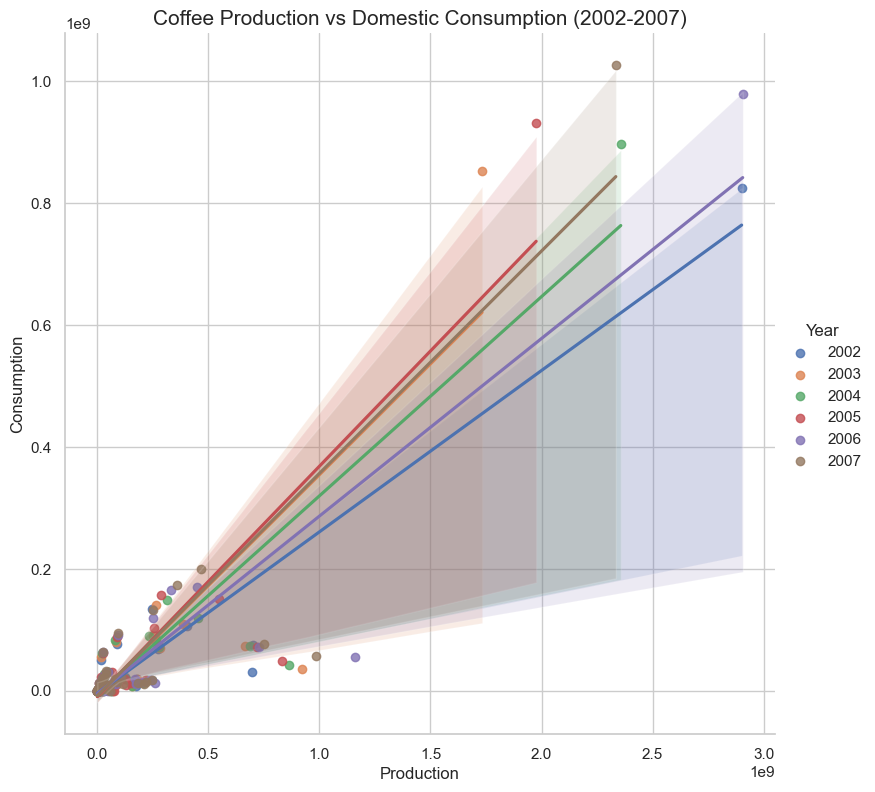

In [39]:
sns.set_theme(style="whitegrid") 

sns.lmplot(data=production_c_07, x="Production", y="Consumption", hue="Year", palette="deep", height=8)

plt.title('Coffee Production vs Domestic Consumption (2002-2007)', fontsize=15) 
plt.xlabel('Production', fontsize=12) 
plt.ylabel('Consumption', fontsize=12)

plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

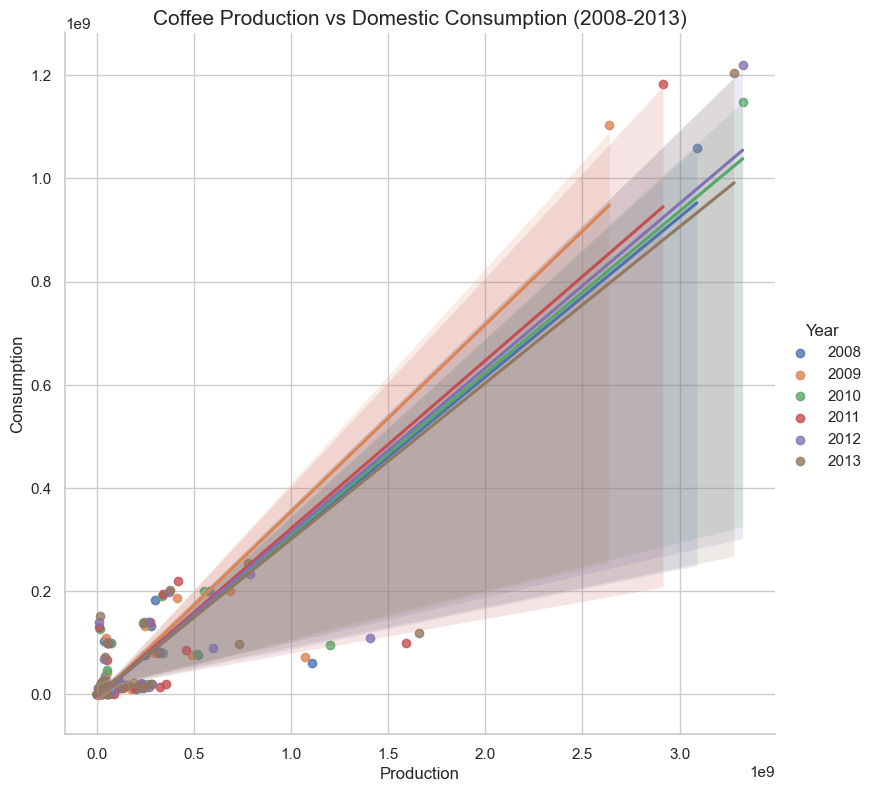

In [40]:
sns.set_theme(style="whitegrid") 

sns.lmplot(data=production_c_13, x="Production", y="Consumption", hue="Year", palette="deep", height=8)

plt.title('Coffee Production vs Domestic Consumption (2008-2013)', fontsize=15) 
plt.xlabel('Production', fontsize=12) 
plt.ylabel('Consumption', fontsize=12)

plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

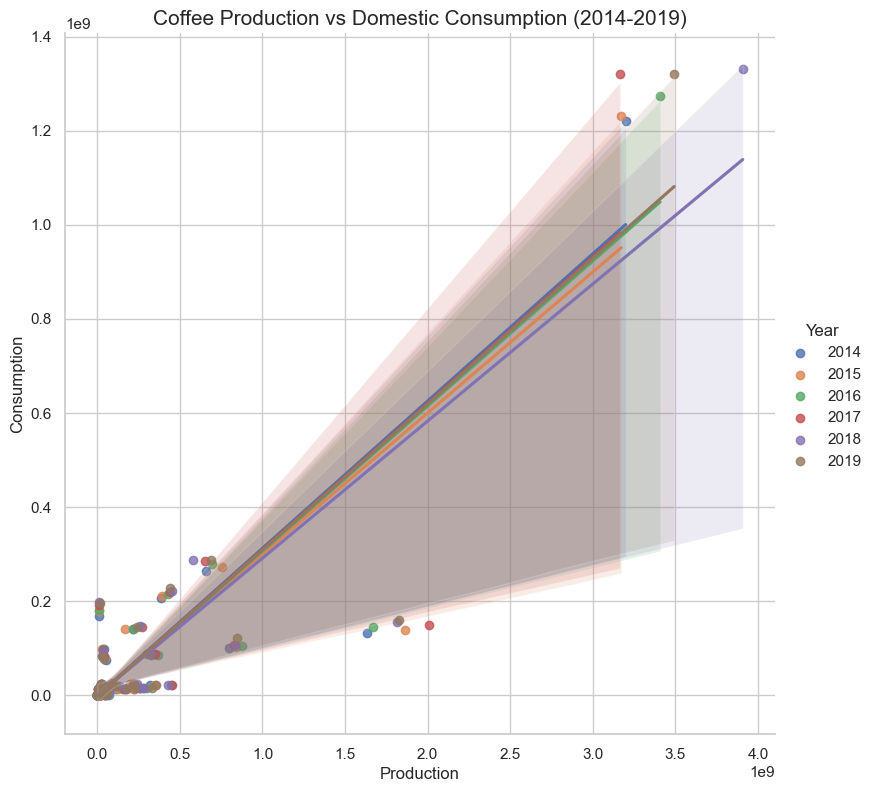

In [41]:
sns.set_theme(style="whitegrid") 

sns.lmplot(data=production_c_19, x="Production", y="Consumption", hue="Year", palette="deep", height=8)

plt.title('Coffee Production vs Domestic Consumption (2014-2019)', fontsize=15) 
plt.xlabel('Production', fontsize=12) 
plt.ylabel('Consumption', fontsize=12)

plt.show()
plt.clf()

Throughout the years we can see that there is a strong relationship between domestic coffee consumption and coffee production. As the production increases the domestic consumption also increases and vice versa.

In [42]:
gr_prdc_95 = production_c_95.groupby('Country')['Consumption'].sum()
gr_prdc_01 = production_c_01.groupby('Country')['Consumption'].sum()
gr_prdc_07 = production_c_07.groupby('Country')['Consumption'].sum()
gr_prdc_13 = production_c_13.groupby('Country')['Consumption'].sum()
gr_prdc_19 = production_c_19.groupby('Country')['Consumption'].sum()

# Sort in descending order and take the top 5
top_5_95 = gr_prdc_95.sort_values(ascending=False).head(5)
top_5_01 = gr_prdc_01.sort_values(ascending=False).head(5)
top_5_07 = gr_prdc_07.sort_values(ascending=False).head(5)
top_5_13 = gr_prdc_13.sort_values(ascending=False).head(5)
top_5_19 = gr_prdc_19.sort_values(ascending=False).head(5)


<Figure size 640x480 with 0 Axes>

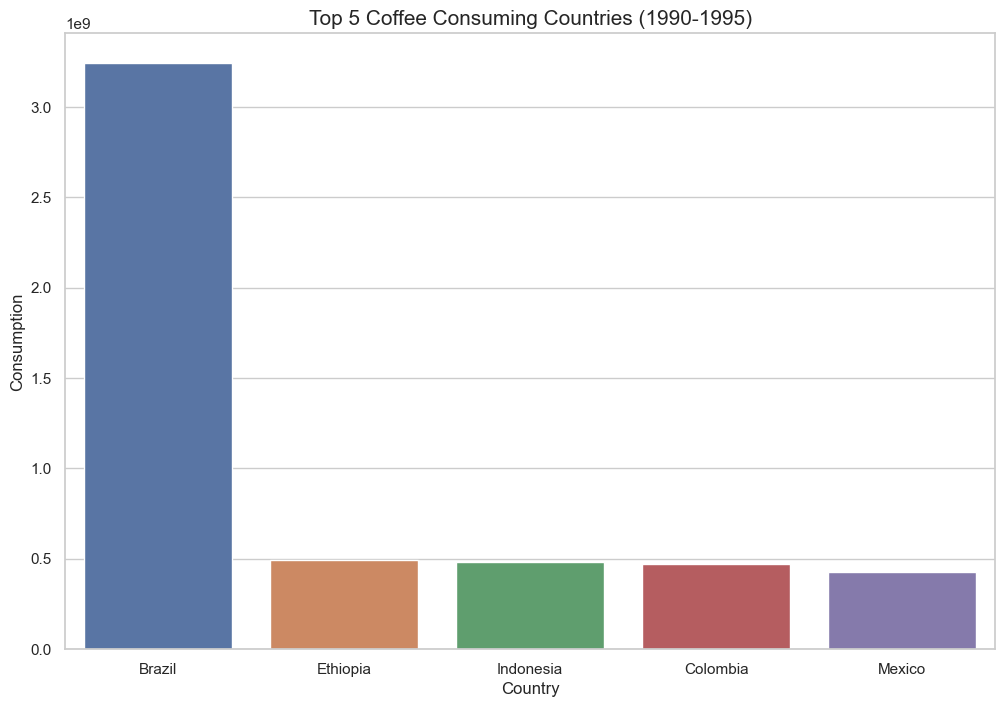

In [43]:
# Ensure the result is a DataFrame
top_5_95 = top_5_95.reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data=top_5_95, x="Country", y="Consumption", palette="deep")

# Adding the necessary labels
plt.title("Top 5 Coffee Consuming Countries (1990-1995)", fontsize=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Consumption", fontsize=12)

# Display the plot
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

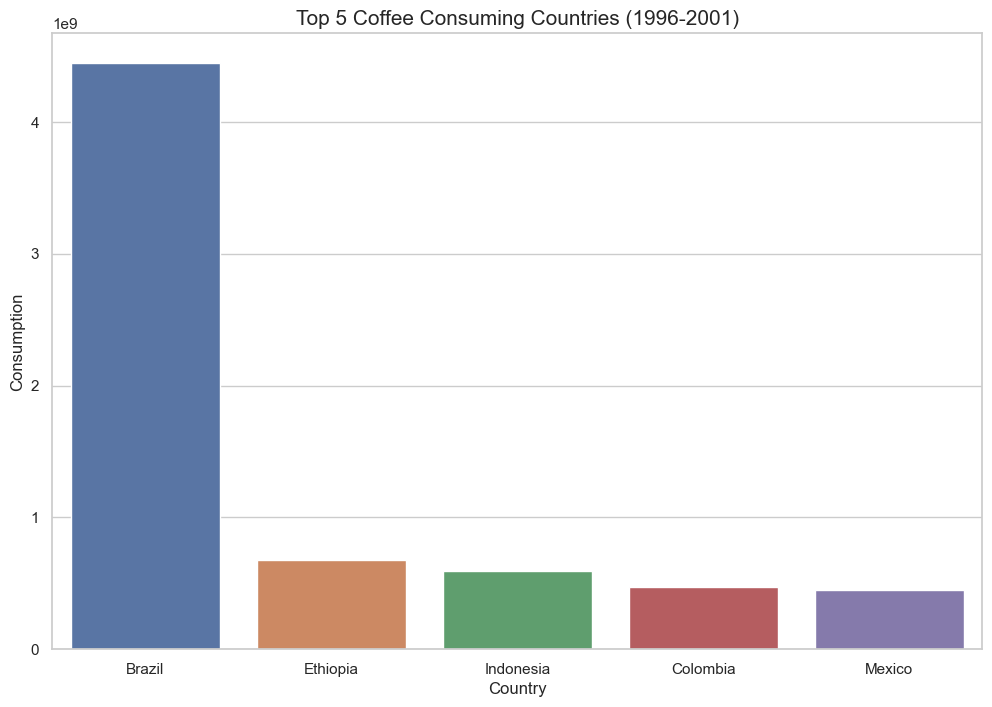

In [44]:
# Ensure the result is a DataFrame
top_5_01 = top_5_01.reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data=top_5_01, x="Country", y="Consumption", palette="deep")

# Adding the necessary labels
plt.title("Top 5 Coffee Consuming Countries (1996-2001)", fontsize=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Consumption", fontsize=12)

# Display the plot
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

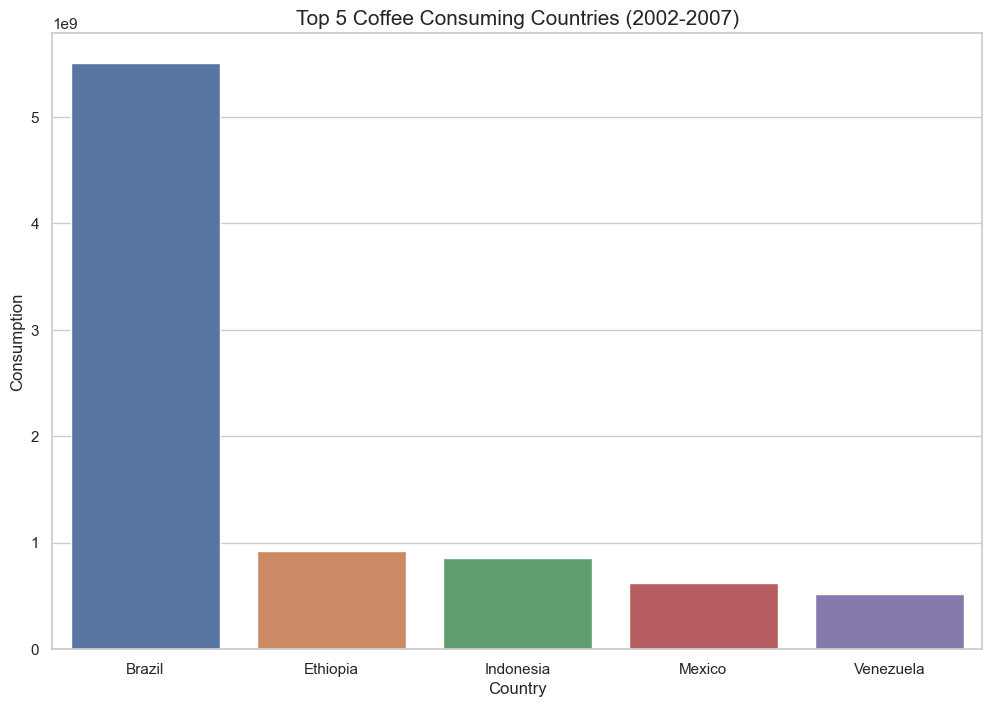

In [45]:
# Ensure the result is a DataFrame
top_5_07 = top_5_07.reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data=top_5_07, x="Country", y="Consumption", palette="deep")

# Adding the necessary labels
plt.title("Top 5 Coffee Consuming Countries (2002-2007)", fontsize=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Consumption", fontsize=12)

# Display the plot
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

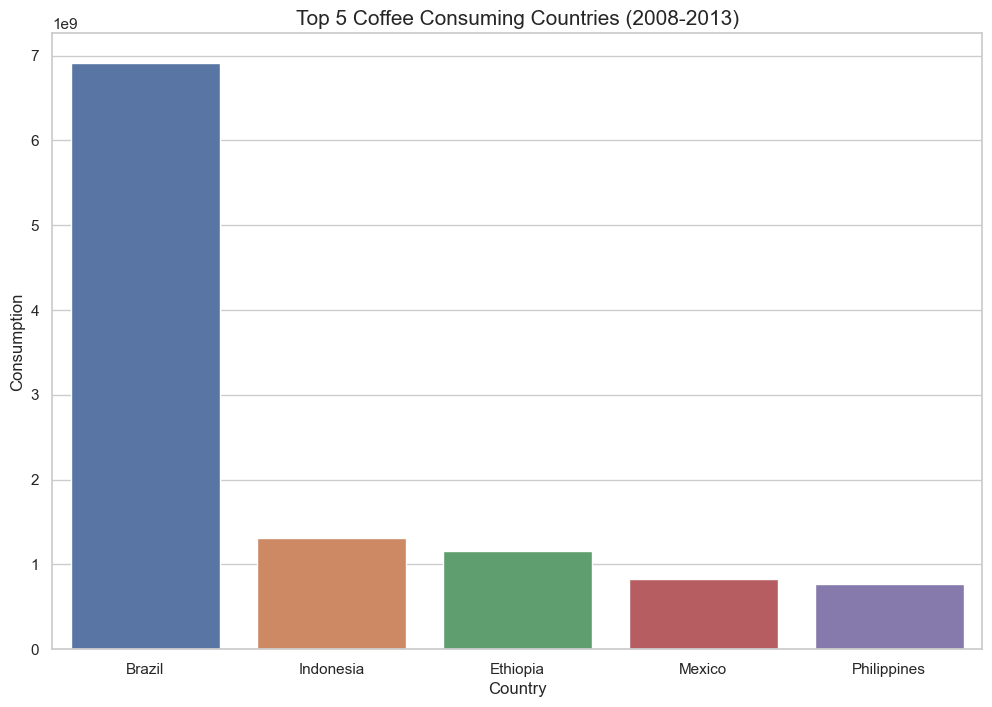

In [46]:
# Ensure the result is a DataFrame
top_5_13 = top_5_13.reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data=top_5_13, x="Country", y="Consumption", palette="deep")

# Adding the necessary labels
plt.title("Top 5 Coffee Consuming Countries (2008-2013)", fontsize=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Consumption", fontsize=12)

# Display the plot
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

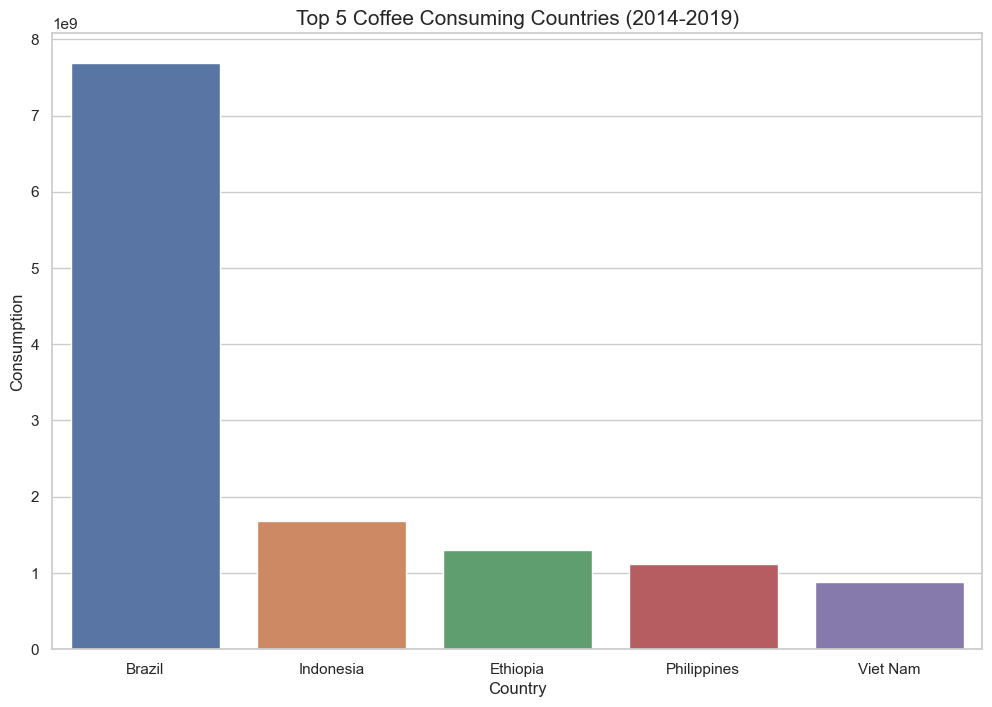

In [47]:
# Ensure the result is a DataFrame
top_5_19 = top_5_19.reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data=top_5_19, x="Country", y="Consumption", palette="deep")

# Adding the necessary labels
plt.title("Top 5 Coffee Consuming Countries (2014-2019)", fontsize=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Consumption", fontsize=12)

# Display the plot
plt.show()
plt.clf()

We can see a pattern where Brazil is a top consumer far above the rest, with Ethiopia and Indonesia battling over second place.

# Question 2: How does coffee consumption correlate with coffee import?

In [48]:
# The correlation coefficient of coffee imports and importers_consumption 1990 - 2019; split up in five year intervals:

corr_imp_95 = imports_95['Importers Consumption'].corr(imports_95['Imports'])
print("Correlation coefficient from 1990 till 95 incl:", corr_imp_95)

corr_imp_01 = imports_01['Importers Consumption'].corr(imports_01['Imports'])
print("Correlation coefficient from 1996 till 2001 incl:", corr_imp_01)

corr_imp_07 = imports_07['Importers Consumption'].corr(imports_07['Imports'])
print("Correlation coefficient from 2002 till 2007 incl:", corr_imp_07)

corr_imp_13 = imports_13['Importers Consumption'].corr(imports_13['Imports'])
print("Correlation coefficient from 2008 till 2013 incl:", corr_imp_13)

corr_imp_19 = imports_19['Importers Consumption'].corr(imports_19['Imports'])
print("Correlation coefficient from 2014 till 2019 incl:", corr_imp_19)


Correlation coefficient from 1990 till 95 incl: 0.9835462007130821
Correlation coefficient from 1996 till 2001 incl: 0.9883023299703497
Correlation coefficient from 2002 till 2007 incl: 0.9663801117235975
Correlation coefficient from 2008 till 2013 incl: 0.9413274060981397
Correlation coefficient from 2014 till 2019 incl: 0.9309415000161356


A correlation coefficient of 0.9 indicates a very strong positive linear relationship between two variables. 

Here's what it means:

A coefficient of 0.9 indicates that as one variable increases, the other variable also tends to increase.

In the context of import_consumption and imports; as import_consumption of coffee increases, the Imports of coffee also tends to increase.

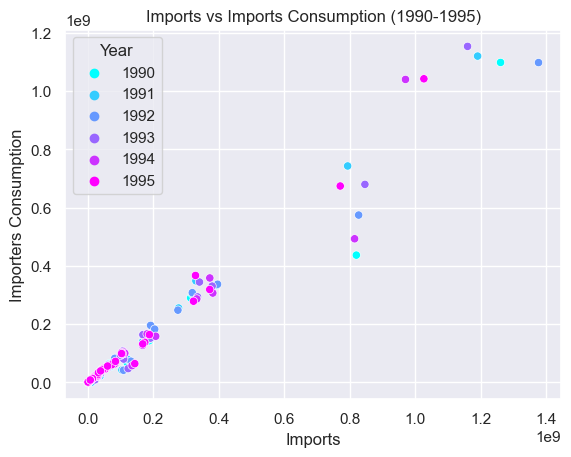

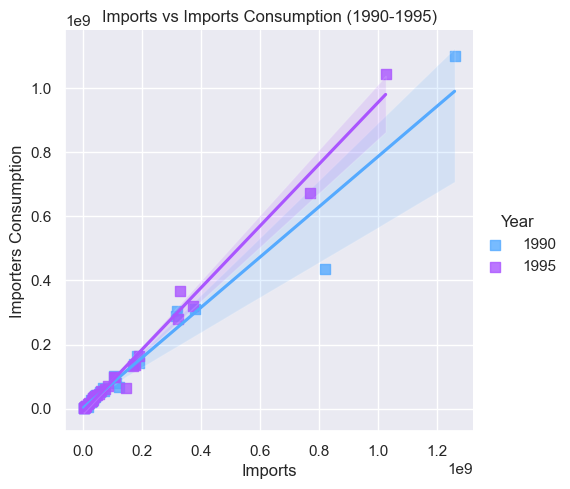

In [49]:
sns.set_style("darkgrid") 

mask = imports_95['Year'].isin([1990, 1995])

# Create a scatterplot 
sns.scatterplot(data=imports_95, x="Imports", y="Importers Consumption", hue="Year", palette="cool")
plt.title('Imports vs Imports Consumption (1990-1995)', fontsize=12)

sns.lmplot(data=imports_95[mask], x="Imports", y="Importers Consumption", hue="Year", palette="cool", markers="s", scatter_kws={'s': 50})

plt.title('Imports vs Imports Consumption (1990-1995)', fontsize=12) 
plt.xlabel('Imports', fontsize=12) 
plt.ylabel('Importers Consumption', fontsize=12) 

plt.show()
plt.clf()

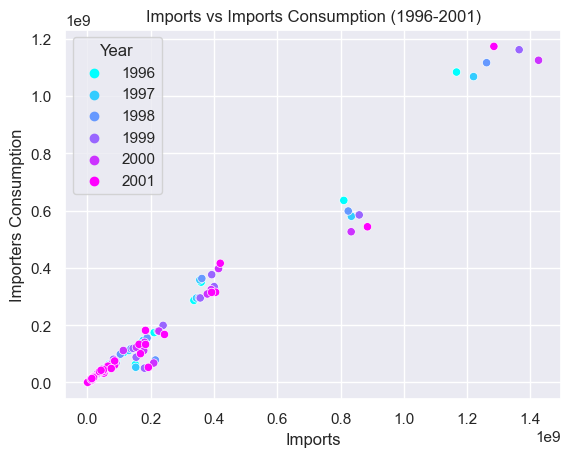

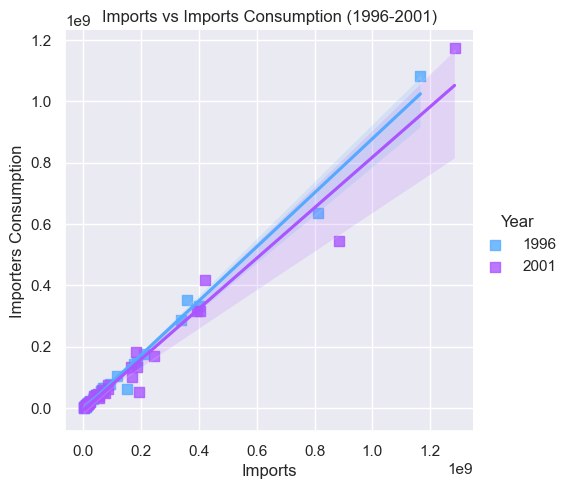

In [50]:
sns.set_style("darkgrid") 

mask_01 = imports_01['Year'].isin([1996, 2001])

# Create a scatterplot 
sns.scatterplot(data=imports_01, x="Imports", y="Importers Consumption", hue="Year", palette="cool")
plt.title('Imports vs Imports Consumption (1996-2001)', fontsize=12)

sns.lmplot(data=imports_01[mask_01], x="Imports", y="Importers Consumption", hue="Year", palette="cool", markers="s", scatter_kws={'s': 50})

plt.title('Imports vs Imports Consumption (1996-2001)', fontsize=12) 
plt.xlabel('Imports', fontsize=12) 
plt.ylabel('Importers Consumption', fontsize=12) 

plt.show()
plt.clf()

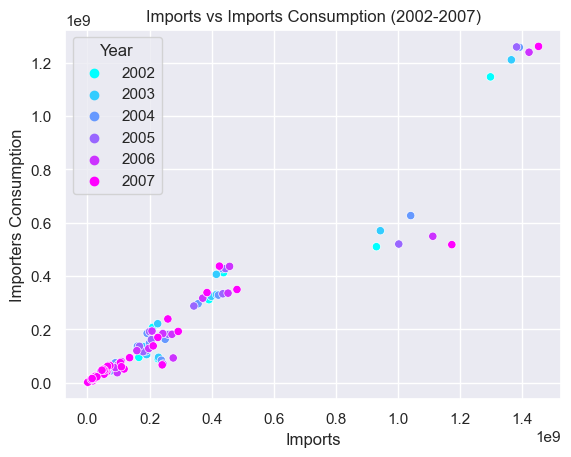

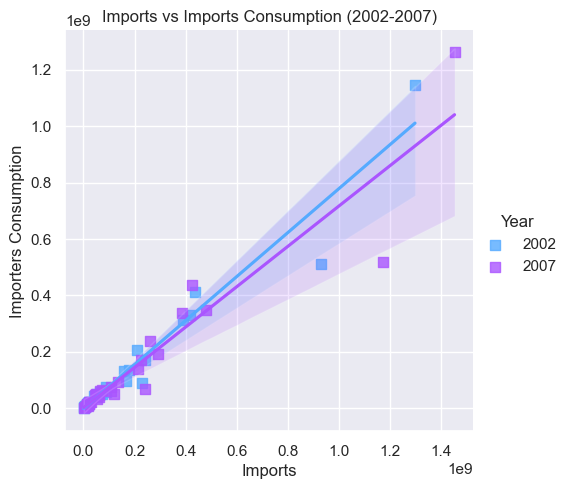

In [51]:
sns.set_style("darkgrid") 

mask_07 = imports_07['Year'].isin([2002, 2007])

# Create a scatterplot 
sns.scatterplot(data=imports_07, x="Imports", y="Importers Consumption", hue="Year", palette="cool")
plt.title('Imports vs Imports Consumption (2002-2007)', fontsize=12)

sns.lmplot(data=imports_07[mask_07], x="Imports", y="Importers Consumption", hue="Year", palette="cool", markers="s", scatter_kws={'s': 50})

plt.title('Imports vs Imports Consumption (2002-2007)', fontsize=12) 
plt.xlabel('Imports', fontsize=12) 
plt.ylabel('Importers Consumption', fontsize=12) 

plt.show()
plt.clf()

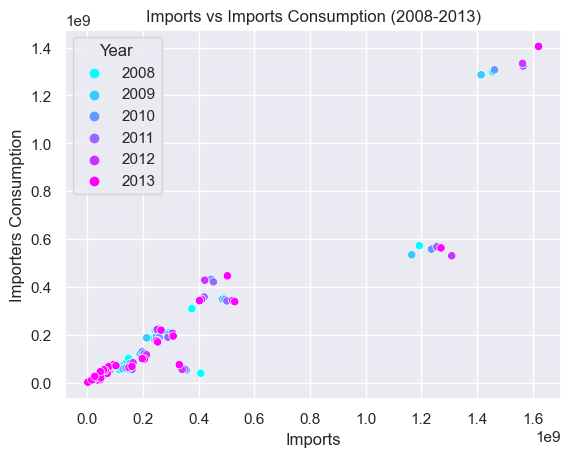

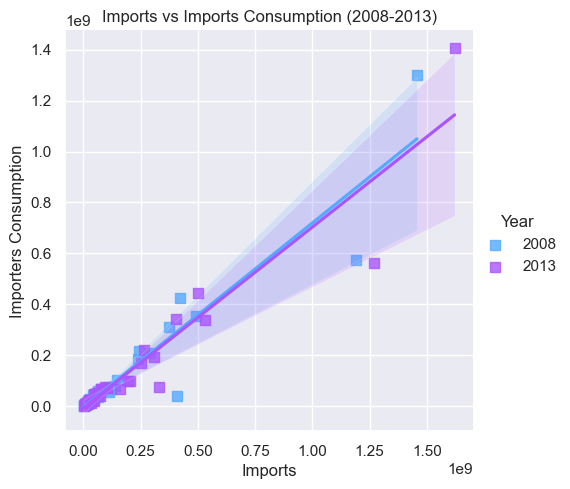

In [52]:
sns.set_style("darkgrid") 

mask_13 = imports_13['Year'].isin([2008, 2013])

# Create a scatterplot 
sns.scatterplot(data=imports_13, x="Imports", y="Importers Consumption", hue="Year", palette="cool")
plt.title('Imports vs Imports Consumption (2008-2013)', fontsize=12)

sns.lmplot(data=imports_13[mask_13], x="Imports", y="Importers Consumption", hue="Year", palette="cool", markers="s", scatter_kws={'s': 50})

plt.title('Imports vs Imports Consumption (2008-2013)', fontsize=12) 
plt.xlabel('Imports', fontsize=12) 
plt.ylabel('Importers Consumption', fontsize=12) 

plt.show()
plt.clf()

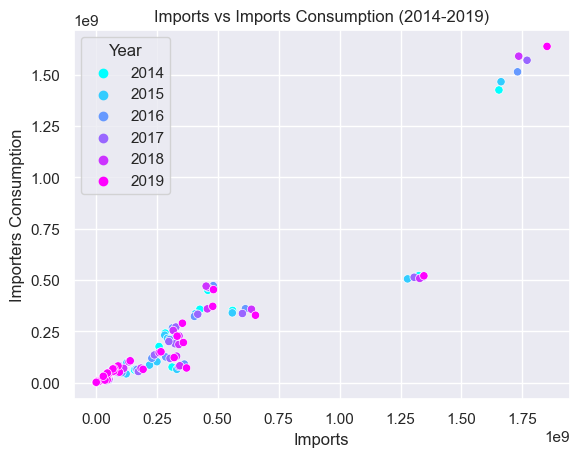

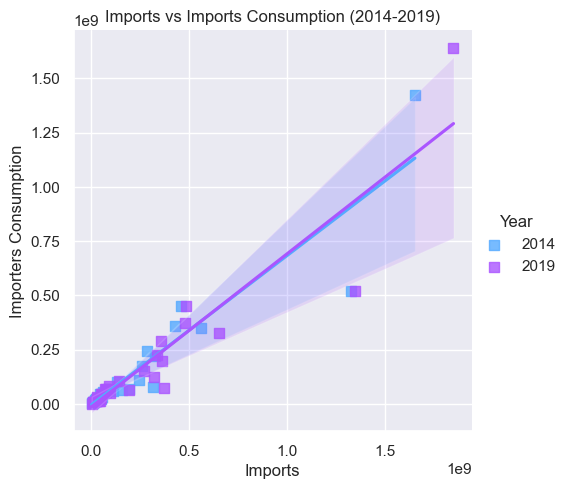

In [53]:
sns.set_style("darkgrid") 

mask_19 = imports_19['Year'].isin([2014, 2019])

# Create a scatterplot 
sns.scatterplot(data=imports_19, x="Imports", y="Importers Consumption", hue="Year", palette="cool")
plt.title('Imports vs Imports Consumption (2014-2019)', fontsize=12)

sns.lmplot(data=imports_19[mask_19], x="Imports", y="Importers Consumption", hue="Year", palette="cool", markers="s", scatter_kws={'s': 50})

plt.title('Imports vs Imports Consumption (2014-2019)', fontsize=12) 
plt.xlabel('Imports', fontsize=12) 
plt.ylabel('Importers Consumption', fontsize=12) 

plt.show()
plt.clf()

The relationship between coffee consumption and coffee imports from 1990 to 2019 has remained significantly positive, indicating a strong correlation. This suggests that as coffee consumption increases, coffee import also tends to increase, indicating that demand is met largely through imports.

From 1990 to 1995, the correlation coefficient was 0.984, indicating an extremely high positive relationship between coffee consumption and coffee imports. The trend continued to be very strong from 1996 to 2001, where the correlation coefficient slightly increased to 0.988.

From 2002 to 2007, despite a minor dip, the correlation remained significantly positive at 0.966. There was a similar trend from 2008 to 2013, with the correlation coefficient further dropping to 0.941 but still showing a strong positive relationship. This trend indicates that while the consumption-import relationship remained robust, there may have been an increased contribution from domestic coffee production or other factors impacting import levels.

The trend from 2014 to 2019 saw the correlation coefficient dip slightly further to 0.931. Though it represents a slight weakening of the relationship compared to previous years, it still indicates a very strong positive correlation between coffee consumption and imports.

In summary, the data from 1990 to 2019 shows that increases in coffee consumption have been accompanied by proportional increases in coffee imports, despite minor fluctuations in the strength of this correlation. This underlines the significance of global trade and import activity in meeting consumer demand for coffee.

# HeadScratchers


- Which country consumes the most coffee domestically?
- What is the trend of coffee consumption over the years?
- What are the largest importers and exporters of coffee?
- Which countries have the highest coffee production?
- How much coffee is consumed?
- Which countries have the largest inventory of green coffee?
- What is the relationship between coffee re-export and coffee import?

In [54]:
from IPython.display import HTML

HTML('''
<div style="border: 2px solid black; display: flex; justify-content: center; align-items: center; padding: 10px; margin-left: auto; margin-right: auto;">
    <img src="https://media3.giphy.com/media/xUOrwpPFzqDh48XEek/giphy.gif?cid=ecf05e47a0yktsaeysfczblg1rt3tvn6ddkztm725evipzi0&ep=v1_gifs_search&rid=giphy.gif&ct=g"/>
</div>
''')

# HeadScratcher
Which country consumes the most coffee domestically?

In [55]:
#to answer this question I will use the merged datafram that contains the domestic consumption.
# we could also just scroll up and see it in the top 5 countries...

top_3_consumers_per_year = df_merged.groupby('Year').apply(lambda x: x.nlargest(3, 'Consumption')[['Country', 'Consumption']])

In [56]:
from IPython.display import HTML

HTML('''
<div style="position: relative; text-align: center; color: black;">
    <img src="https://www.icegif.com/wp-content/uploads/icegif-3602.gif" style="width: 300px;" />
    <h1 style="position: absolute; top: 20%; left: 30%; transform: translate(-50%, -50%); font-size: 50px;">BRAZIL</h1>
</div>
''')

In [57]:
top_3_consumers_per_year.head()

Country  Consumption
Year                           
1990 2      Brazil    492000000
     41     Mexico     82440000
     5   Indonesia     74520000
1991 57     Brazil    510000000
     60  Indonesia     76800000

# HeadScratcher
What is the trend of coffee consumption over the years?

In [58]:
# convert the 'Year' column to string
melted_consumption['Year'] = melted_consumption['Year'].astype(str)

# keep only the first four characters
melted_consumption['Year'] = melted_consumption['Year'].str[:4]

# convert the 'Year' column back to integer
melted_consumption['Year'] = melted_consumption['Year'].astype(int)

melted_consumption

,Country,Coffee type,Year,Consumption
0,Angola,Robusta/Arabica,1990,1200000
1,Bolivia (Plurinational State of),Arabica,1990,1500000
2,Brazil,Arabica/Robusta,1990,492000000
3,Burundi,Arabica/Robusta,1990,120000
4,Ecuador,Arabica/Robusta,1990,21000000
...,...,...,...,...
1645,Trinidad & Tobago,Robusta,2019,600000
1646,Uganda,Robusta/Arabica,2019,15240000
1647,Venezuela,Arabica,2019,76500000
1648,Viet Nam,Robusta/Arabica,2019,159000000


In [59]:
melt_importers_cons

,Country,Year,Importers Consumption
0,Austria,1990,80400000
2,Belgium/Luxembourg,1990,67440000
3,Bulgaria,1990,6120000
5,Cyprus,1990,1860000
6,Czechia,1990,39540000
...,...,...,...
1045,Russian Federation,2019,289200000
1046,Switzerland,2019,64380000
1047,Tunisia,2019,30480000
1048,United Kingdom,2019,226200000


Coffee Consumption Trend Among Domestic Addicts:

In [60]:
dom_consumption = melted_consumption.groupby('Year')['Consumption'].sum().reset_index()

<Figure size 640x480 with 0 Axes>

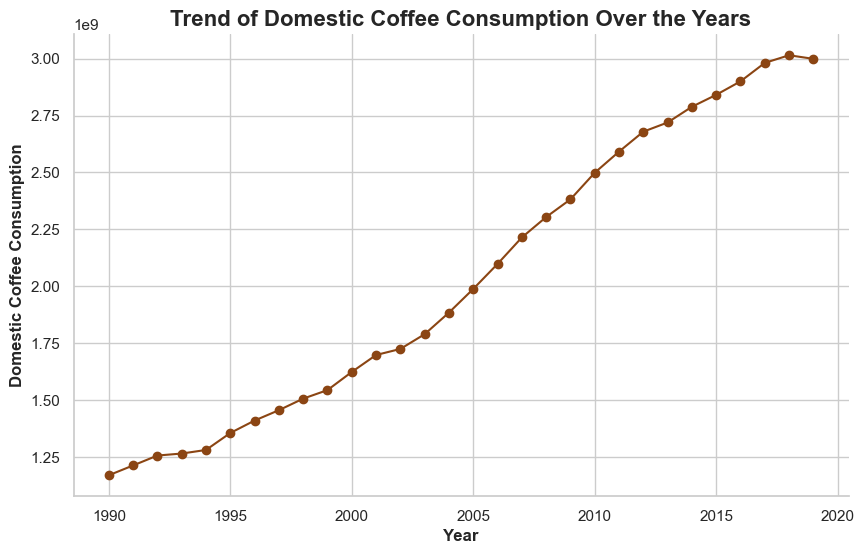

In [61]:
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(dom_consumption['Year'], dom_consumption['Consumption'], marker='o', color='#8B4513') 

plt.title('Trend of Domestic Coffee Consumption Over the Years', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Domestic Coffee Consumption', fontweight='bold', fontsize=12)

sns.set_style({"axes.facecolor": "f7f1e3", "axes.edgecolor": "8B4513"})
sns.despine()

plt.show()
plt.clf()

Coffee Consumption Trend Among Importer Addicts:

In [62]:
imp_consumption = melt_importers_cons.groupby('Year')['Importers Consumption'].sum().reset_index()

<Figure size 640x480 with 0 Axes>

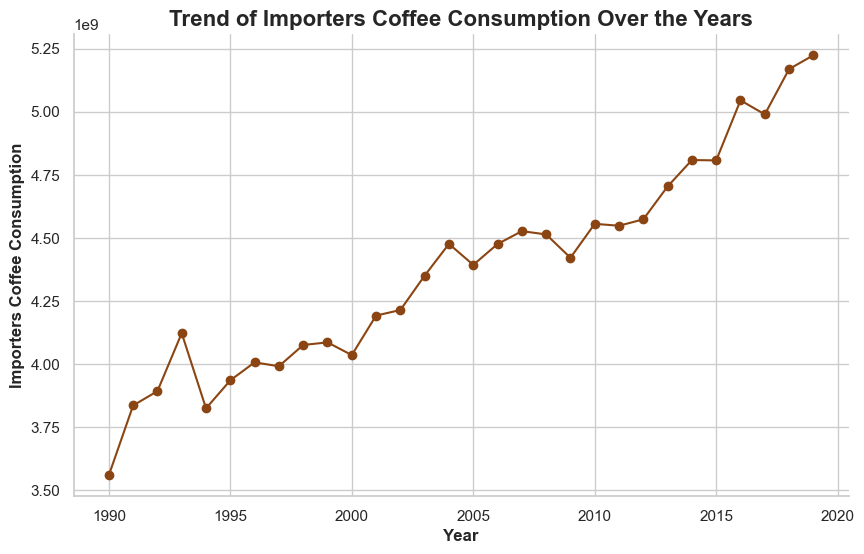

In [63]:
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(imp_consumption['Year'], imp_consumption['Importers Consumption'], marker='o', color='#8B4513') 

plt.title('Trend of Importers Coffee Consumption Over the Years', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Importers Coffee Consumption', fontweight='bold', fontsize=12)

sns.set_style({"axes.facecolor": "f7f1e3", "axes.edgecolor": "8B4513"})
sns.despine()

plt.show()
plt.clf()

 We can see that Importers consume by far more coffee than the domestic consumption of domestic coffee produced.

# HeadScratcher
Who are the largest importers and exporters of coffee?

In [64]:
#top exporters per year
top_exporters_per_year = df_export.set_index('Country').iloc[:, :-1].idxmax(axis=0)

#dataframe
top_exporters_per_year = top_exporters_per_year.reset_index()
top_exporters_per_year.columns = ['Year', 'Top_Exporter']

# Print the result
print(top_exporters_per_year)

    Year Top_Exporter
0   1990       Brazil
1   1991       Brazil
2   1992       Brazil
3   1993       Brazil
4   1994       Brazil
5   1995       Brazil
6   1996       Brazil
7   1997       Brazil
8   1998       Brazil
9   1999       Brazil
10  2000       Brazil
11  2001       Brazil
12  2002       Brazil
13  2003       Brazil
14  2004       Brazil
15  2005       Brazil
16  2006       Brazil
17  2007       Brazil
18  2008       Brazil
19  2009       Brazil
20  2010       Brazil
21  2011       Brazil
22  2012       Brazil
23  2013       Brazil
24  2014     Viet Nam
25  2015     Viet Nam
26  2016       Brazil
27  2017       Brazil
28  2018       Brazil
29  2019     Viet Nam


In [65]:
#top exporters per year
top_importers_per_year = df_import.set_index('Country').iloc[:, :-1].idxmax(axis=0)

#dataframe
top_importers_per_year = top_importers_per_year.reset_index()
top_importers_per_year.columns = ['Year', 'Top_Importer']

# Print the result
print(top_importers_per_year)

    Year              Top_Importer
0   1990  United States of America
1   1991  United States of America
2   1992  United States of America
3   1993  United States of America
4   1994  United States of America
5   1995  United States of America
6   1996  United States of America
7   1997  United States of America
8   1998  United States of America
9   1999  United States of America
10  2000  United States of America
11  2001  United States of America
12  2002  United States of America
13  2003  United States of America
14  2004  United States of America
15  2005  United States of America
16  2006  United States of America
17  2007  United States of America
18  2008  United States of America
19  2009  United States of America
20  2010  United States of America
21  2011  United States of America
22  2012  United States of America
23  2013  United States of America
24  2014  United States of America
25  2015  United States of America
26  2016  United States of America
27  2017  United Sta

# HeadScratcher
Which country has the highest coffee production?

In [66]:
top_producers = df_production.set_index('Country')['Total_production'].idxmax()

print(top_producers)

Brazil


# HeadScratcher
How much coffee is consumed?

The amount of coffee on these datasets are in tons, we will for the sake of this answer assume that the importers consumption and domestic consumption arent related and then create a total per year, "World Wide" consumption.

In [67]:
total_coffee_consumed_year = pd.merge(melt_importers_cons, melted_consumption, on='Year', how='outer')
total_coffee_consumed_year['World_Wide_Consumption'] = total_coffee_consumed_year['Importers Consumption'] + total_coffee_consumed_year['Consumption']

In [68]:
def format_large_number(num):
    return "{:.2f} Billion".format(num / 1e9)


total_consumption_per_year = total_coffee_consumed_year.groupby('Year')['World_Wide_Consumption'].sum()


total_consumption_per_year = total_consumption_per_year.apply(format_large_number)


print(total_consumption_per_year)

Year
1990    226.20 Billion
1991    242.53 Billion
1992    254.33 Billion
1993    268.50 Billion
1994    252.64 Billion
1995    261.21 Billion
1996    266.93 Billion
1997    267.58 Billion
1998    273.89 Billion
1999    277.24 Billion
2000    277.18 Billion
2001    288.32 Billion
2002    290.44 Billion
2003    300.14 Billion
2004    310.28 Billion
2005    309.23 Billion
2006    317.51 Billion
2007    324.27 Billion
2008    326.60 Billion
2009    324.16 Billion
2010    335.53 Billion
2011    338.27 Billion
2012    342.64 Billion
2013    351.18 Billion
2014    359.28 Billion
2015    360.99 Billion
2016    376.09 Billion
2017    375.79 Billion
2018    386.80 Billion
2019    389.28 Billion
Name: World_Wide_Consumption, dtype: object


yep, we all love coffeeeee!!!

Thats 100s of billions of tons of coffeee!!

# Tableau

I will be exporting some of the dataframes that I created here as excel files for use in Tableau

Find my Tableau link for this project here: https://public.tableau.com/app/profile/andre.slabbert/viz/MoreEspressoLessDepresso/Dashboard1

#create excel files out of dataframes

df_merged.to_excel('1_production_domestic_consumption.xlsx', index=False)

melt_importers_cons.to_excel('2_importers_consumption.xlsx', index=False)

melt_imports.to_excel('3_imports.xlsx', index=False)

imports_merged.to_excel('4_imports_merged.xlsx', index=False)

imports_95.to_excel('5_imports_95.xlsx', index=False)

imports_01.to_excel('6_imports_01.xlsx', index=False)

imports_07.to_excel('7_imports_07.xlsx', index=False)

imports_13.to_excel('8_imports_13.xlsx', index=False)

imports_19.to_excel('9_imports_19.xlsx', index=False)

top_3_consumers_per_year.to_excel('10_top_3_consumers.xlsx', index=False)

dom_consumption.to_excel('11_domestic_consumption.xlsx', index=False)

imp_consumption.to_excel('12_importers_cons_total.xlsx', index=False)

top_exporters_per_year.to_excel('13_top_exporters_year.xlsx', index=False)

top_importers_per_year.to_excel('14_top_importers_year.xlsx', index=False)

total_coffee_per_year.to_excel('15_total_coffee_year.xlsx', index=False)

production_c_95.to_excel('16_pro_95.xlsx', index=False)
production_c_01.to_excel('17_pro_01.xlsx', index=False)
production_c_07.to_excel('18_pro_07.xlsx', index=False)
production_c_13.to_excel('19_pro_13.xlsx', index=False)
production_c_19.to_excel('20_pro_19.xlsx', index=False)

#Disclaimer:

The analysis and recommendations presented in this project are solely for educational and portfolio purposes. They should not be considered as professional advice or used for making business decisions. The data used in this analysis is for illustrative purposes only and may not reflect real-world scenarios accurately. The author of this project does not take any responsibility for the actions taken based on the information provided herein.

It is strongly recommended that you consult with a qualified professional or subject matter expert before making any decisions based on the insights presented in this project.

In [69]:
from IPython.display import HTML

HTML('''
<div style="border: 2px solid black; display: flex; justify-content: center; align-items: center; padding: 10px; margin-left: auto; margin-right: auto;">
    <img src="https://media1.giphy.com/media/tkApIfibjeWt1ufWwj/giphy.gif"/>
</div>
''')